# Welcome to Week 4: 1. Clustering
* ## Task to be discussed in this Workshop are: 
* ## Demo for K-means clustering
* ## Task 1.1 Perform K-means on a real dataset
* ## Task 1.2 (Optional) Try PCA for dimensionality reduction.
* ## Task 1.3: Perform agglomerative clustering on this data set


In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

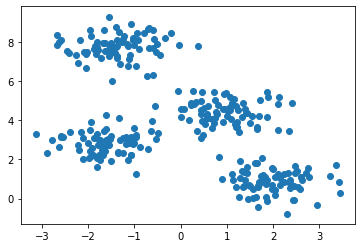

In [2]:
# Generate an exmaple 2-dimensional datasets containing 4 clusters for a demo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# Create a K-means clustering model with k=4, and k-means++ as the intialization strategy
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)

# Perform clustering by fitting the model with the data
kmeans.fit(X)

# We can explore the parameters learned from the data. 
# What's the cluster center? 
print('\n Cluter center: \n', kmeans.cluster_centers_)

# What's is overall distorion (inertia)? 
print('\n Overall distortion: \n', kmeans.inertia_)
# Average standard distortion
print('\n Average distortion: \n', math.sqrt(kmeans.inertia_/X.shape[0]))


 Cluter center: 
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]

 Overall distortion: 
 212.00599621083478

 Average distortion: 
 0.8406465690384491


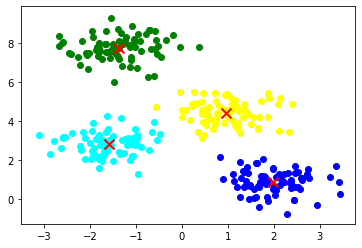

In [4]:
# Predict the cluster for each data instance. This step can be combined with the last one by using kmeans.fit_predict(X)
y_pred = kmeans.predict(X)

# Visualize the cluster centers to explore how the clustering result looks like
colors = ['blue', 'yellow', 'green', 'cyan']
for i, color in enumerate(colors):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], c=color)
     
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', lw=2, c='red', s=100)
plt.show()

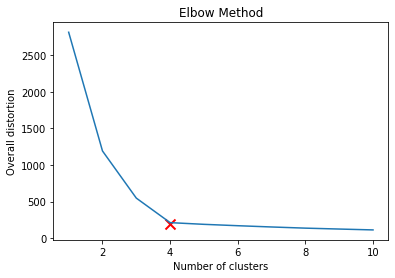

In [5]:
# How about other k values? Which k value should we choose to get the optimal clustering? Let's vary k from 1 to 10 and see how the distortion changes.
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
# Plot the relationship between the distortion and k. Then, we can have the Elbow method to help identify a good value for k.
plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Overall distortion')
plt.scatter(4, distortions[4], marker='x', lw=2, c='red', s=100)
plt.show()

# It can be seen that k=4 is reasonably good

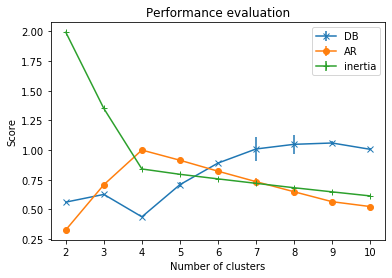

In [6]:
# Let's evaluate the learned model with other quality criteria

# Internal evaluation, davies bouldin score (the lower, the better)
db_scores = []
db_scores_std = []

# External evaluation, adjusted rand index (the higher, the better)
ar_scores = []
ar_scores_std = []

# Inertia (average standardized)
inertia = []
inertia_std = []

for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    ar_scores_tmp = []
    inertias_tmp = []
    
    n_iteration=5
    for j in range(0, n_iteration):
        # Note: 'random_state' parameter should be set as default or None
        #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
        kmeans = KMeans(n_clusters=i, init='random', max_iter=300)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
        ar_scores_tmp.append(adjusted_rand_score(labels, y_pred))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
    ar_scores.append(np.mean(ar_scores_tmp))
    ar_scores_std.append(np.std(ar_scores_tmp))
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))

# Plot the relationship between the davies bouldin score and k
plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.errorbar(range(2, 11), ar_scores, yerr=ar_scores_std, marker='o', label='AR')
plt.errorbar(range(2, 11), inertia, yerr=inertia_std, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

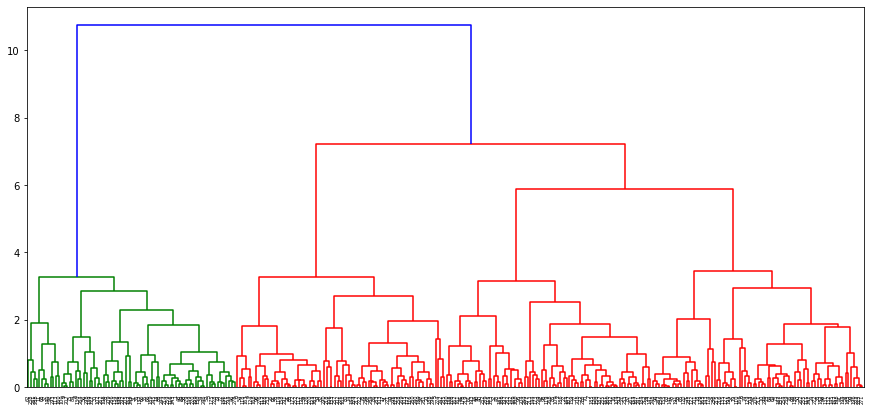

In [7]:
# Try agglomerative clustering on this dataset, and visualise the hierarchy.

dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

# It can be seen that the clustering structure contains four main clusters, complying with the data.

## Task Clustering on the MNIST data set

In [8]:
# Now, let's work on a real dataset. See detailed information for the dataset: https://en.wikipedia.org/wiki/MNIST_database.

#Load the data. Orignal data set has been processed (downsampled) to facilitate your data analysis
raw_data = pd.read_csv("mnist-0.1.csv")
print('\n data size: (%d, %d)\n' % raw_data.shape)

# Specifying features and target attribute
X = raw_data.drop(['Label'], axis='columns')

# Pre-processing with standardization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

y = raw_data['Label'].values


 data size: (5243, 785)



In [9]:
# K-means clustering model
model = KMeans(n_clusters=2)
model.fit(X)
print('\n cluster means: \n', model.cluster_centers_)
print('\n inertia: %f'% model.inertia_)
print('\n average inertia: %f\n' % math.sqrt(model.inertia_/y.size))


 cluster means: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 inertia: 214710.126187

 average inertia: 6.399357



In [10]:
# Evaluation (internal)
labels = model.labels_
scores=davies_bouldin_score(X, labels)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 2.722454



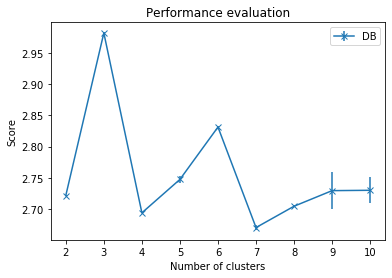

In [11]:
# Task 1.1 Try k from 2 to 10 to determine which is the best value w.r.t. davies_bouldin_score, plot the relationship between the davies_bouldin_score and k

# Compute davies bouldin score
    
# Plot the relationship between the distortion and k

db_scores = []
db_scores_std = []

for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    
    n_iteration=5
    for j in range(0, n_iteration):
        # Note: 'random_state' parameter should be set as default or None
        
        kmeans = KMeans(n_clusters=i, init='random', max_iter=300)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [12]:
model1 = KMeans(n_clusters=10)
model1.fit(X)
label1 = model1.labels_
dbscore = davies_bouldin_score(X, label1)
print('\n davies_bouldin_score: %f\n' % dbscore)


 davies_bouldin_score: 2.727084



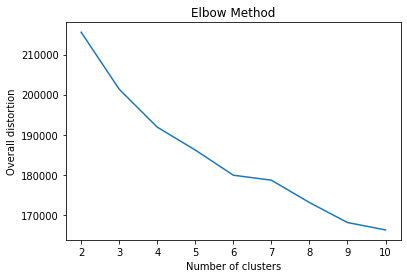

In [13]:
distortions1 = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=3, n_init=2,random_state=0)
    kmeans.fit(X)
    distortions1.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Overall distortion')
plt.show()

In [14]:
# Task 1.2 (Optional) Given that this is a high dimensional data. It might be good to reduce the dimension first. 
# PCA can be used for this purpose. Try some reduced dimensionality, e.g., math.sqrt(X.shape[1]). Try this for different k values with plotting.

# dimenion redcution
from sklearn.decomposition import PCA

# Compute davies bouldin score
    
# Plot the relationship between the score and k


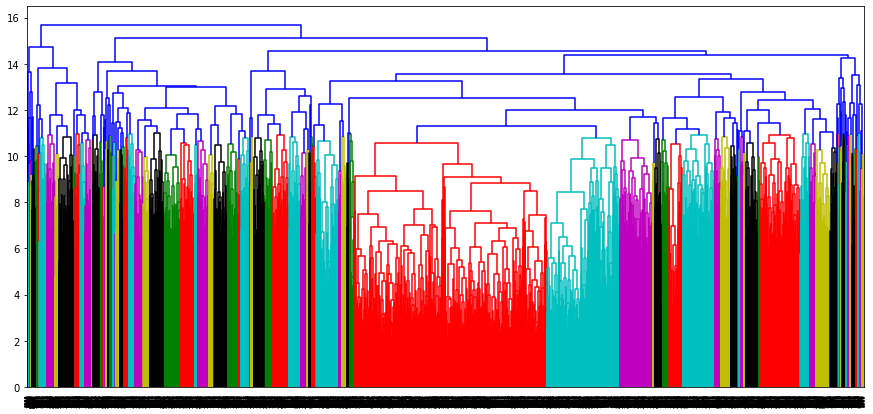

In [15]:
# Task 1.3 Try to perform agglomerative clustering on the dataset, and visualise the hierarchy.

dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()